Normalization techniques in data science are used to scale or transform data so that it can be effectively used in machine learning models and statistical analysis. This is especially important when features in the data have different units or scales, which can bias models.



Min-Max Scaling (Normalization)
Scales the data to a fixed range, usually [0, 1].

Formula:

𝑥
′
=
𝑥
−
𝑥
𝑚
𝑖
𝑛
/
x
max
​
 −x
min
​

case: Good when you need a bounded range (e.g., neural networks).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [3]:
df = pd.read_csv("/content/wine.csv", header= None,usecols=[0,1,2])
df.columns= ['Class label' , 'Alcohol' , 'Malic_Acid']
df.sample(5)

,Class label,Alcohol,Malic_Acid
68,2,12.37,1.17
43,1,13.88,1.89
122,2,11.56,2.05
76,2,11.66,1.88
166,3,13.73,4.36


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class label  179 non-null    object
 1   Alcohol      179 non-null    object
 2   Malic_Acid   179 non-null    object
dtypes: object(3)
memory usage: 4.3+ KB


apply(pd.to_numeric, errors='coerce'): converts all values to numbers; invalid parsing will be set to NaN (errors='coerce').

In [12]:
# df['Alcohol'] = pd.to_numeric(df['Alcohol], errord='coerce)

cols_to_convert = df.columns[:]
df[cols_to_convert]= df[cols_to_convert].apply(pd.to_numeric,errors='coerce')



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  178 non-null    float64
 1   Alcohol      178 non-null    float64
 2   Malic_Acid   178 non-null    float64
dtypes: float64(3)
memory usage: 4.3 KB


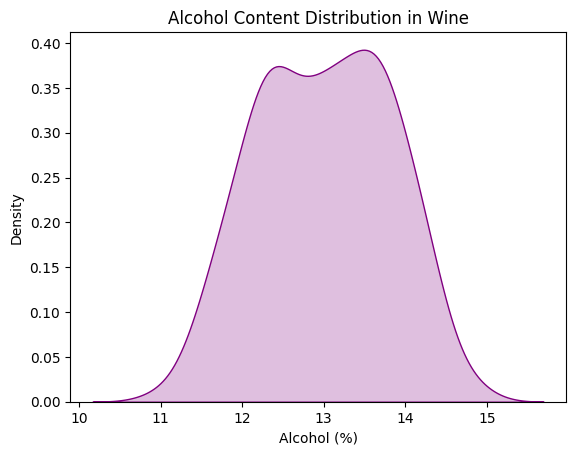

In [15]:
sns.kdeplot(df['Alcohol'], fill=True, color='purple')
plt.title("Alcohol Content Distribution in Wine")
plt.xlabel("Alcohol (%)")
plt.ylabel("Density")
plt.show()

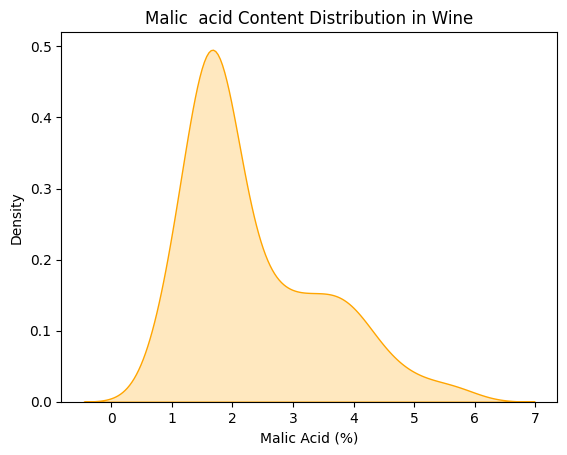

In [17]:
sns.kdeplot(df['Malic_Acid'], fill=True, color='orange')
plt.title("Malic  acid Content Distribution in Wine")
plt.xlabel("Malic Acid (%)")
plt.ylabel("Density")
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

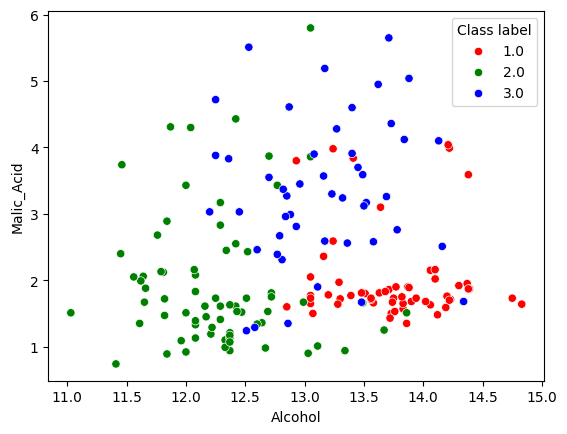

In [18]:
color_dict = {1:'red' ,  2:'green' , 3:'blue'}
sns.scatterplot(data=df,x='Alcohol' , y = 'Malic_Acid' , hue='Class label',palette = color_dict)

In [21]:
x = df.iloc[:,1:]
x

,Alcohol,Malic_Acid
0,NaN,NaN
1,14.23,1.71
2,13.20,1.78
3,13.16,2.36
4,14.37,1.95
...,...,...
174,13.71,5.65
175,13.40,3.91
176,13.27,4.28
177,13.17,2.59


In [23]:
y = df.iloc[:,:1]
y

,Class label
0,NaN
1,1.0
2,1.0
3,1.0
4,1.0
...,...
174,3.0
175,3.0
176,3.0
177,3.0


In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test= train_test_split(x, y , test_size=0.2 , random_state=0)

x_train.shape , x_test.shape

((143, 2), (36, 2))

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [32]:
x_train_scaler.shape , x_test_scaler.shape

((143, 2), (36, 2))

'numpy.ndarray' convert to Dataframe

In [37]:
x_train_scaler = pd.DataFrame(x_train_scaler , columns= x_train.columns)
x_test_scaler = pd.DataFrame(x_test_scaler, columns=x_test.columns)

describe oldest data without scaling


Round an array to the given number of decimals.

In [41]:
np.round(x_train.describe(),1)

,Alcohol,Malic_Acid
count,142.0,142.0
mean,13.0,2.3
std,0.8,1.1
min,11.0,0.7
25%,12.3,1.5
50%,13.0,1.8
75%,13.7,2.9
max,14.8,5.6


In [42]:
np.round(x_train_scaler.describe(),1)

,Alcohol,Malic_Acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


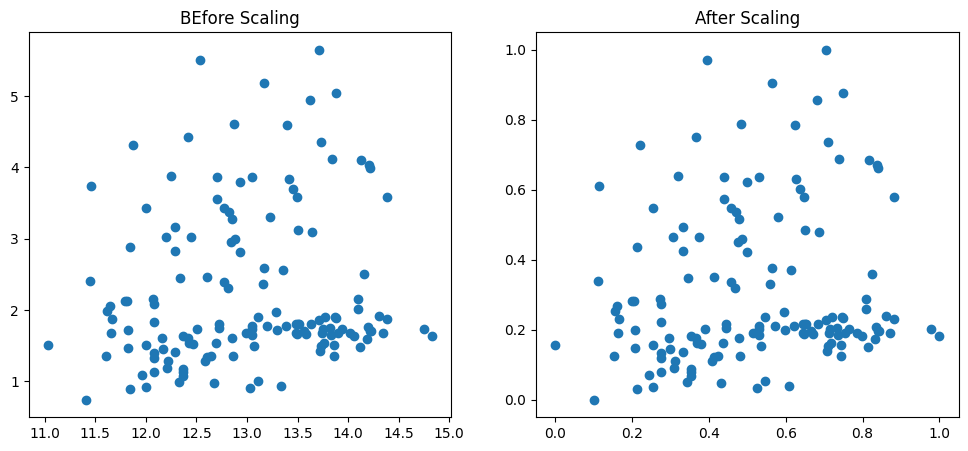

In [47]:
fig, (ax1 , ax2)= plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(x_train['Alcohol'] , x_train['Malic_Acid'])
ax1.set_title('BEfore Scaling')
ax2.scatter(x_train_scaler['Alcohol'], x_train_scaler['Malic_Acid'])
ax2.set_title('After Scaling')
plt.show()

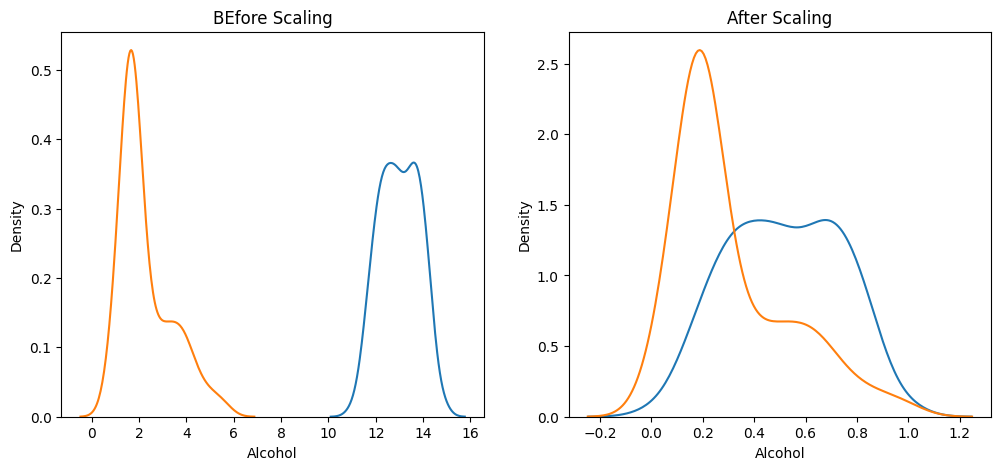

In [48]:
fig, (ax1 , ax2)= plt.subplots(ncols=2 , figsize=(12,5))
ax1.set_title('BEfore Scaling')
sns.kdeplot(x_train['Alcohol'], ax= ax1)
sns.kdeplot(x_train['Malic_Acid'],ax= ax1)

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaler['Alcohol'], ax=ax2)
sns.kdeplot(x_train_scaler['Malic_Acid'],ax=ax2)
plt.show()



Now they are in same range... Scaling  scaled the  both columns in 1 range

Z-Score Normalization (Standardization)
Scales the data based on mean and standard deviation.

Formula:

𝑥
′
=
𝑥
−
𝜇
/
𝜎

where
𝜇
μ is the mean and
𝜎
σ is the standard deviation.

Use case: Preferred when data follows a normal (Gaussian) distribution.

4. MaxAbs Scaling
Scales each feature by its maximum absolute value, resulting in values between [-1, 1].

Formula:

𝑥
′
=
𝑥
∣
𝑥
𝑚
𝑎
𝑥

​

Use case: Sparse data, such as text data represented by TF-IDF or CountVectorizer.



3. Robust Scaling
Uses the median and IQR (Interquartile Range) instead of mean and standard deviation.

Formula:

𝑥
′
=
𝑥
−
median /
𝐼
𝑄
𝑅


Use case: Good for data with outliers.